# ch04: ニューラルネットワークの学習

## 4.2.1

In [1]:
import numpy as np

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t) **2)

#### 正解が２の時の２乗誤差

In [3]:
# yは2を出力するニューラルネットワークの出力
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# yは7を出力するニューラルネットワークの出力
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

**2乗誤差は的確に予測できている一例目の方が小さい**

## 4.2.2

/tmp/ipykernel_574643/2864048418.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x_log)


(-5.0, 0.0)

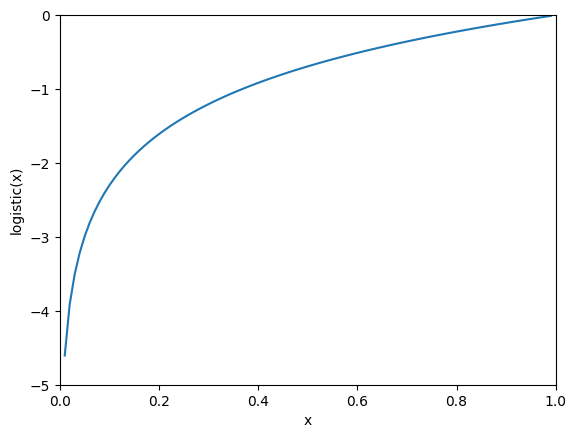

In [5]:
import matplotlib.pyplot as plt
x_log = np.arange(0.0, 1.0, 0.01)
# y = logxの自然対数
y = np.log(x_log)
plt.plot(x_log, y)
plt.xlabel("x")
plt.ylabel("logistic(x)")
plt.xlim(0.0, 1.0)
plt.ylim(-5.0, 0.0)

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7 # log(0)のときの-infを防ぐため
    return -np.sum(t * np.log(y + delta))

In [7]:
# 各項で掛け算される
a = np.array([1,3])
b = np.array([2,2])
a*b

array([2, 6])

In [8]:
# yは2を出力するニューラルネットワークの出力
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
# yは7を出力するニューラルネットワークの出力
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

**2乗誤差同様，的確に予測できている一例目の方が交差エントロピーが小さい**

## 4.2.3
#### ミニバッチ学習のランダム抽出について

In [10]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのパスを追加
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
# normalize=True：.0~1.0の範囲で正規化
# one_hot_label=True：ラベルをone-hot表現に変換
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [11]:
train_size = x_train.shape[0] # 学習データ数60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 60000の中から10個分のindexランダム選択
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [12]:
np.random.choice(60000, 10)
# 60000の中から10個分のindexランダム選択(seed固定)

array([56958, 53842,  6719, 58665, 42534, 39701, 42966, 48384,  2597,
       20267])

#### ｙ次元数１に対応する交差エントロピー関数

In [13]:
# データが一つの場合でもバッチとしてまとめられるようにif文で対応

def cross_entropy_error(y, t):
    if y.ndim == 1: # yが一つ分のデータのみ
        print("before reshape: y.shape = ", y.shape)
        print("              : t.shape = ", t.shape)
        t = t.reshape(1, t.size) # 1行t.size列に変形
        y = y.reshape(1, y.size) # 1行y.size列に変形
        print(" after reshape: y.shape = ", y.shape)
        print("              : t.shape = ", t.shape)
    batch_size = y.shape[0] # バッチサイズ取得
    return -np.sum(t * np.log(y + 1e-7)) / batch_size # バッチサイズで割る

In [14]:
# yが一次元であるという場合は以下のようになる
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

before reshape: y.shape =  (10,)
              : t.shape =  (10,)
 after reshape: y.shape =  (1, 10)
              : t.shape =  (1, 10)


0.510825457099338

In [15]:
# yが二次元であるという場合は以下のようになる
t = [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]
y = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
     [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]]
cross_entropy_error(np.array(y), np.array(t))
# バッチサイズで割ることで，正規化される
# 1e-7は数値が0になるのを防ぐための小さな値

0.510825457099338

#### one-hot表現以外の交差エントロピー関数実装

In [16]:
# one-hot表現以外に対応するようにするために，returnの部分を修正
# one-hot表現上で0の箇所はエントロピー誤差も０となる，つまり1の箇所だけ計算すれば良い

def cross_entropy_error(y, t):
    if y.ndim == 1:
        print("before reshape: y.shape = ", y.shape)
        print("              : t.shape = ", t.shape)
        t = t.reshape(1, t.size) 
        y = y.reshape(1, y.size) 
        print(" after reshape: y.shape = ", y.shape)
        print("              : t.shape = ", t.shape)
    batch_size = y.shape[0] 
    print("batch_size = ", batch_size)
    print(np.arange(batch_size))
    print(y[np.arange(batch_size), t])
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [17]:
# yが一次元であるという場合は以下のようになる
# t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
t = 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

before reshape: y.shape =  (10,)
              : t.shape =  ()
 after reshape: y.shape =  (1, 10)
              : t.shape =  (1, 1)
batch_size =  1
[0]
[[0.6]]


0.510825457099338

In [18]:
# yが二次元であるという場合は以下のようになる
t = [2, 2]
y = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
     [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]]
cross_entropy_error(np.array(y), np.array(t))

batch_size =  2
[0 1]
[0.6 0.6]


0.510825457099338

In [19]:
# 上記で使われているコードの利用方法について
range = np.arange(4)
t_ = np.array([0, 1, 2, 3]) # [ラベル0, ラベル1, ラベル2, ラベル3]を表す（one-hot表現ではない）
y = np.array(
    [[0.6, 0.05, 0.1, 0.0],
     [0.1, 0.6, 0.05, 0.0],
     [0.1, 0.05, 0.6, 0.0],
     [0.1, 0.05, 0.0, 0.6]])
print(y[range, t_]) # 該当する場所の値を取得できる（[range[0]][t_[0]]のような組み合わせで該当箇所を取得）
cross_entropy_error(y, t_)


[0.6 0.6 0.6 0.6]
batch_size =  4
[0 1 2 3]
[0.6 0.6 0.6 0.6]


0.510825457099338

## 4.3
#### 悪い微分の実装例

In [20]:
def numerical_diff(f, x): #numerical = 数値的な
    h = 1e-50
    return (f(x+h) - f(x))/h

上記の微分関数の問題点
- h = 1e-50による丸め誤差の発生
- 関数fの差分で誤差が発生

In [21]:
# 丸め誤差について
print(np.float64(1e-50)+np.float64(1e-50))
print(np.float32(1e-50))
print(np.float32(1e-5))

2e-50
0.0
1e-05


#### 中心差分による実装

In [22]:
# 関数fの差分について
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def numerical_diff_foreward(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / h

#### 数値微分の例

In [23]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

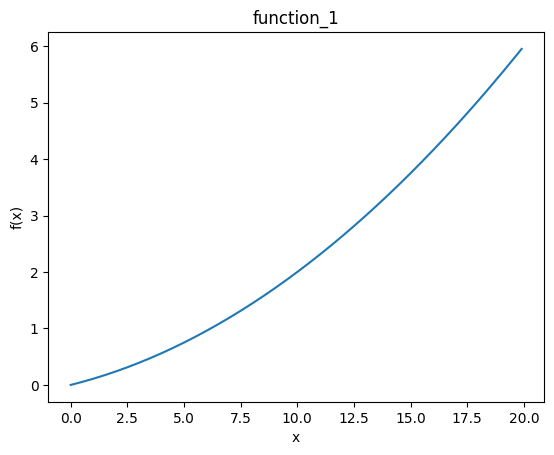

In [24]:
import matplotlib.pyplot as plt
x_graph = np.arange(0.0, 20.0, 0.1)
y = function_1(x_graph)
plt.plot(x_graph, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("function_1")
plt.show()

In [25]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [26]:
# 真の値：0.2
print(abs(0.2 - numerical_diff(function_1, 5)))
print(abs(0.2 - numerical_diff_foreward(function_1, 5)))

9.102163467389346e-13
9.999991725240243e-07


In [27]:
# 真の値：0.3
print(abs(0.3 - numerical_diff(function_1, 10)))
print(abs(0.3 - numerical_diff_foreward(function_1, 10)))

1.3652967645327863e-12
9.999976072205818e-07


0.1999999999990898


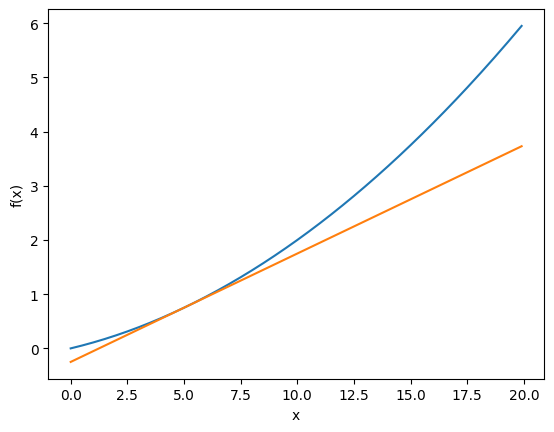

In [28]:
%run ./sample_programs/gradient_11d.py

0.2999999999986347


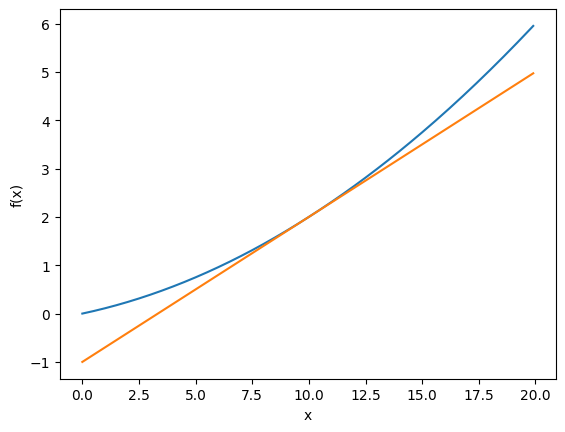

In [29]:
%run ./sample_programs/gradient_12d.py

#### 偏微分

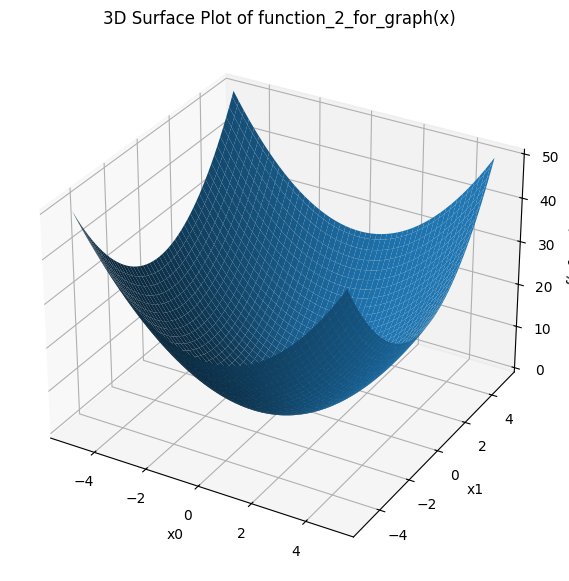

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3Dプロット用

# 描画範囲の設定
x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)
X0, X1 = np.meshgrid(x0, x1)

def function_2_for_graph(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2) # xの要素を全て二乗して足し合わせる

# Z軸の計算（各点で function_2_for_graph を適用）
Z = function_2_for_graph(np.array([X0, X1]))

# 3Dプロットの設定
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X0, X1, Z)

# 軸ラベル
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("f(x0, x1)")
ax.set_title("3D Surface Plot of function_2_for_graph(x)")

plt.show()


x0=3, x1=4 のときのx0に対する偏微分は，，，，

In [31]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2

numerical_diff(function_tmp1, 3.0) # x0=3.0のときの微分値

6.00000000000378

In [32]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0) # x1=4.0のときの微分値

7.999999999999119